In [1]:
from seq2seq.data.data_manager import Seq2SeqDataManager
from seq2seq.model.seq2seq_learner import Seq2seqLearner
import torch

In [2]:
DEVICE = 'cpu'
MIN_LENGTH = 3
MAX_LENGTH = 10
MIN_COUNT = 3

## Get data
# data_manager=Seq2SeqDataManager.create_from_txt('data/eng-fra_sub.txt')
data_manager = Seq2SeqDataManager.create_from_txt('data/eng-fra_sub.txt','en', 'fr',
                                                  min_freq=MIN_COUNT, min_ntoks=MIN_LENGTH,
                                                  max_ntoks=MAX_LENGTH, switch_pair=True, device=DEVICE)

kept 1679 sequences from 1680 sequences
kept 1679 sequences from 1680 sequences
kept 1679 sequences from 1679 sequences
kept 1679 sequences from 1679 sequences
kept 184 sequences from 184 sequences
kept 184 sequences from 184 sequences
kept 184 sequences from 184 sequences
kept 184 sequences from 184 sequences


Encoder embedding vector didnt have 285 tokens, example ['!', 'je', 'suis', 'est', '?']
Decoder embedding vector didnt have 269 tokens, example ['i', 'it', '!', 'm', '?']
0:0:10.78 (1 100.0%) loss train: 4.416 loss valid: 3.509


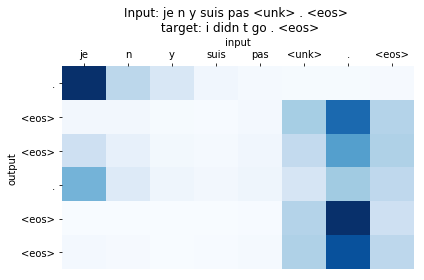

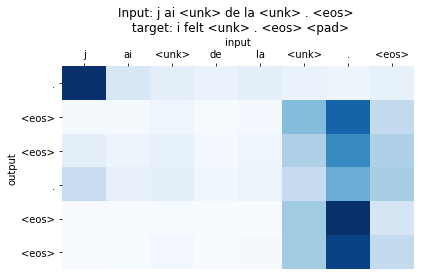

In [3]:
hidden_size=50
learner=Seq2seqLearner(data_manager,hidden_size)
learner.fit(1, show_attention_every=5)

In [4]:
original_xtext = 'Je suis sûr.'
original_ytext = 'I am sure.'
predicted_text = learner.predict(original_xtext, device=DEVICE)
print(f'original text: {original_xtext}')
print(f'original answer: {original_ytext}')
print(f'predicted text: {predicted_text}')

original text: Je suis sûr.
original answer: I am sure.
predicted text: . <eos>


In [5]:
learner.state_dict

<bound method Module.state_dict of Seq2seqLearner(
  (encoder): EncoderRNN(
    (embedding): Embedding(285, 50, padding_idx=1)
    (gru): GRU(50, 50, num_layers=2, dropout=0.1, bidirectional=True)
  )
  (decoder): LuongAttnDecoderRNN(
    (embedding): Embedding(269, 50, padding_idx=1)
    (embedding_dropout): Dropout(p=0.1)
    (gru): GRU(50, 50, num_layers=2, dropout=0.1)
    (concat): Linear(in_features=100, out_features=50, bias=True)
    (out): Linear(in_features=50, out_features=269, bias=True)
    (attn): Attn()
  )
)>

In [6]:
torch.save(learner.state_dict(), 'example_state_dict.pth')

In [7]:
model=Seq2seqLearner(data_manager,hidden_size)
model.load_state_dict(torch.load('example_state_dict.pth'))

Encoder embedding vector didnt have 285 tokens, example ['!', 'je', 'suis', 'est', '?']
Decoder embedding vector didnt have 269 tokens, example ['i', 'it', '!', 'm', '?']


In [8]:
model

Seq2seqLearner(
  (encoder): EncoderRNN(
    (embedding): Embedding(285, 50, padding_idx=1)
    (gru): GRU(50, 50, num_layers=2, dropout=0.1, bidirectional=True)
  )
  (decoder): LuongAttnDecoderRNN(
    (embedding): Embedding(269, 50, padding_idx=1)
    (embedding_dropout): Dropout(p=0.1)
    (gru): GRU(50, 50, num_layers=2, dropout=0.1)
    (concat): Linear(in_features=100, out_features=50, bias=True)
    (out): Linear(in_features=50, out_features=269, bias=True)
    (attn): Attn()
  )
)

In [9]:
model.predict(original_xtext, device=DEVICE)

'. <eos>'

In [5]:
torch.save(learner,'sample_model.pth')

AttributeError: Can't pickle local object 'FeatureExtracter.<locals>.feature_extracter_fwd'

In [7]:
model = torch.load('sample_model.pth')

In [8]:
model.predict(original_xtext, device=DEVICE)

'i m m . <eos>'

In [7]:
import spacy

In [8]:
spacy.__version__

'2.0.16'